# **Bioinformatics Project - Computational Drug Discovery for Breast Cancer**

This is a real-life Data Science and Machine Learning Model and in this model We will be building machine learning model using ChEMBL bioactivity data.

# ***PART 2: Exploratory Data Analysis***

## Install Conda and RDKit

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-10-29 23:10:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   104MB/s    in 0.8s    

2022-10-29 23:10:58 (104 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

## Load Bioactivity Dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('bioactivity_preprocessed_data_1.csv')

## Calculate Lipinski Descriptors

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [5]:
# The lipinski function takes 'smiles' notation as an input which takes the chemical information
# The chemical information that smiles tell us has the exact atomic details that the molecule contain
# So this atomic details like MolWt, MolLogP, NumHDonors, NumHAcceptors will help us to calculate the Molecular Descriptors
# 1. MolWt = Molecular Weight
# 2. MolLogP = Solubility of the Molecule
# 3. NumHDonors = Number of Hydrogen Bond Donors
# 4. NumHAcceptors = Number of Hydrogen Bond Acceptors 

def lipinski(smiles, verbose=False):
  moldata = []
  for elem in smiles:
    mol=Chem.MolFromSmiles(elem)
    moldata.append(mol)

  baseData = np.arange(1, 1)
  i=0
  for mol in moldata:
    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

    row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])

    if (i==0):
      baseData = row
    else:
      baseData = np.vstack([baseData, row])
    
    i=i+1
  
  columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
  descriptors = pd.DataFrame(data=baseData, columns=columnNames)

  return descriptors

In [6]:
df_lipinski = lipinski(df.canonical_smiles)

In [7]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2831,286.459,5.46460,0.0,1.0
2832,286.459,5.54580,1.0,1.0
2833,531.440,4.20580,0.0,7.0
2834,296.410,4.02950,0.0,2.0


## Combine Data Frames - **[df_lipinski and bioactivity_preprocessed_data.csv]**

In [8]:
df_combined = pd.concat([df, df_lipinski], axis=1)

In [9]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,7100.0,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,50000.0,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,238.0,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,57.0,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,54.0,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2831,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,intermediate,7900.0,286.459,5.46460,0.0,1.0
2832,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,intermediate,3700.0,286.459,5.54580,1.0,1.0
2833,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,intermediate,2400.0,531.440,4.20580,0.0,7.0
2834,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,active,23.0,296.410,4.02950,0.0,2.0


## Convert IC50 to pIC50

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

1. Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
2. Take the molar value and apply -log10
3. Delete the standard_value column and create a new pIC50 column

In [10]:
def pIC50(input):
  pIC50 = []

  for i in input['standard_value_norm']:
    molar = i*(10**-9) # Converts nM to M
    pIC50.append(-np.log10(molar))

  input['pIC50'] = pIC50
  x = input.drop('standard_value_norm', 1)

  return x

In [11]:
df_combined.standard_value.describe()

count    2.836000e+03
mean     2.214962e+10
std      7.303889e+11
min      0.000000e+00
25%      1.068625e+02
50%      1.091340e+03
75%      7.617500e+03
max      3.388442e+13
Name: standard_value, dtype: float64

In [12]:
-np.log10 ((10**-9)* 100000000)

1.0

In [13]:
def norm_value(input):
  norm = []

  for i in input['standard_value']:
    if i> 100000000:
      i = 100000000
    norm.append(i)

  input['standard_value_norm'] = norm
  x = input.drop('standard_value', 1)

  return x

In [14]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.0
...,...,...,...,...,...,...,...,...
2831,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,intermediate,286.459,5.46460,0.0,1.0,7900.0
2832,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,intermediate,286.459,5.54580,1.0,1.0,3700.0
2833,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,intermediate,531.440,4.20580,0.0,7.0,2400.0
2834,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,active,296.410,4.02950,0.0,2.0,23.0


In [15]:
df_norm.standard_value_norm.describe()

count    2.836000e+03
mean     3.249726e+05
std      4.997506e+06
min      0.000000e+00
25%      1.068625e+02
50%      1.091340e+03
75%      7.617500e+03
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [16]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2831,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,intermediate,286.459,5.46460,0.0,1.0,5.102373
2832,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,intermediate,286.459,5.54580,1.0,1.0,5.431798
2833,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,intermediate,531.440,4.20580,0.0,7.0,5.619789
2834,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,active,296.410,4.02950,0.0,2.0,7.638272


In [17]:
df_final.pIC50.describe()

count    2836.000000
mean             inf
std              NaN
min         1.000000
25%         5.118191
50%         5.962040
75%         6.971179
max              inf
Name: pIC50, dtype: float64

## Removing the **'intermediate'** bioactivity_class values, as we only want 'active' and 'inactive' values

In [18]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2828,CHEMBL4866633,C[C@H]1C[C@]2(O)O[C@@]1(C)C=C1CC[C@H]3C(C)(C)C...,inactive,304.474,4.67270,1.0,2.0,4.928118
2829,CHEMBL4859743,C[C@@H]1O[C@]2(C(C)(C)O)C=C3CC[C@H]4C(C)(C)CCC...,inactive,336.472,4.12570,1.0,4.0,4.970616
2830,CHEMBL4863718,C=C[C@]1(C)C=C2CC[C@H]3C(C)(C)CCC[C@]3(C)[C@H]...,inactive,272.476,6.14150,0.0,0.0,4.982967
2834,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,active,296.410,4.02950,0.0,2.0,7.638272


## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [19]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

## Frequency Plot of the 2 Bioactivity Classes - **'active'** & **'inactive'**

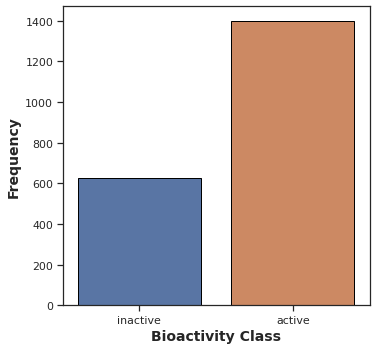

In [20]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

It can be seen below that the 2 Bioactvity Classes are spanning similar chemical spaces

## Box Plot for **pIC50 values**

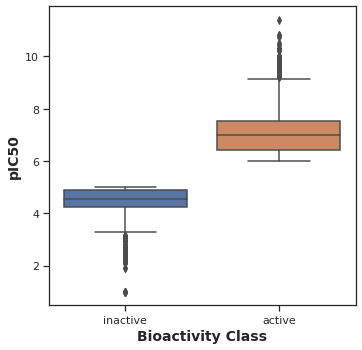

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2class)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')
plt.savefig('plot_pIC50.pdf')

# It shows that distribution is as we wanted
# pIC50 < 5 belongs to 'inactive' class
# pIC50 > 6 belons to 'active' class

## Statistical Analysis | **Mann-Whitney U Test**

In [25]:

def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  # Seed the random number generator
  seed(1)

  # actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

  # compare samples
  stat, p = mannwhitneyu(active, inactive)

  # interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor': descriptor,
                          'Statistics': stat,
                          'p': p,
                          'alpha': alpha,
                          'Interpretation': interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [26]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,878427.0,1.934700e-284,0.05,Different distribution (reject H0)


## **MW** - Box Plot & MannWhitney

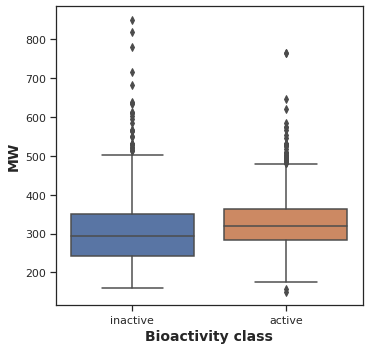

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [28]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,519106.5,5.544925e-11,0.05,Different distribution (reject H0)


## **LogP** - - Box Plot & MannWhitney

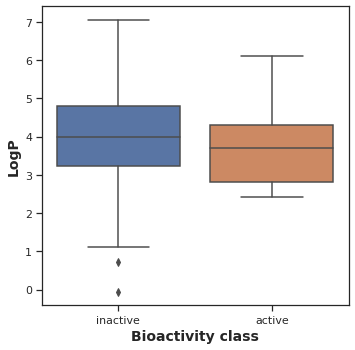

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [29]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,432264.5,0.568574,0.05,Same distribution (fail to reject H0)


## **NumHDonors** - Box Plot & MannWhitney

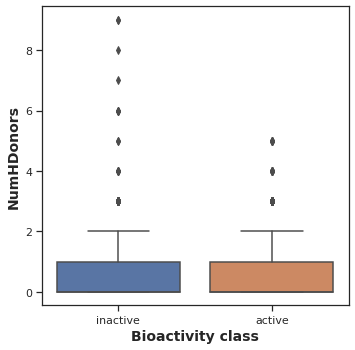

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')


In [31]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,395096.5,0.000031,0.05,Different distribution (reject H0)


## **NumHAcceptors** - Box Plot & MannWhitney

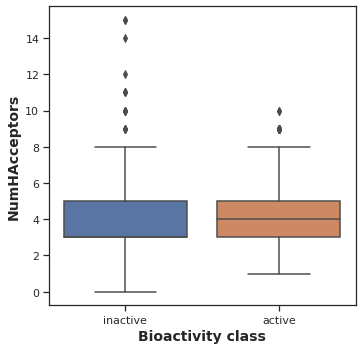

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [33]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,509527.5,4.107477e-09,0.05,Different distribution (reject H0)


## **Interpretation of the Statistical Results obtained**

**Box Plots**

**pIC50 values**

Taking a look at ***pIC50 values***, the ***actives and inactives*** displayed statistically ***significant difference***, which is to be expected since threshold values `(IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives)` were used to define actives and inactives.

**Lipinski's descriptors**

Of the 4 Lipinski's Descriptors (MW, LogP, NumHDonors, NumHAcceptors), only ***LogP*** exhibited ***no difference*** between the ***actives and inactives***, while the other 3 descriptors (MW, NumHDonors, NumHAcceptors) shows statistically significant difference between actives and inactives.

# Zip Files

In [34]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_MW_vs_LogP.pdf (deflated 13%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_pIC50.pdf (deflated 36%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: bioactivity_preprocessed_data_1.csv (deflated 83%)
  adding: plot_MW.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
